# ML Report - cardiovascular disease

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset and a first view of the dataset
df = pd.read_csv("../data/cardio_train.csv", sep=";").drop(columns="id")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [80]:
# Manipulate data
df["age"] = (df["age"]/365).astype(int) # Convert age from days to years
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


Hur m˚anga ¨ar positiva f¨or hj¨art-k¨arlsjukdom och hur m˚anga ¨ar negativa?
b) Hur stor andel har normala, ¨over normala och l˚angt ¨over normala kolesterolv
¨arden?
c) Hur ser ˚aldersf¨ordelningen ut?
d) Hur stor andel r¨oker?
e) Hur ser viktf¨ordelningen ut?
f) Hur ser l¨angdf¨ordelningen ut?
g) Hur stor andel av kvinnor respektive m¨an har hj¨art-k¨arlsjukdom?

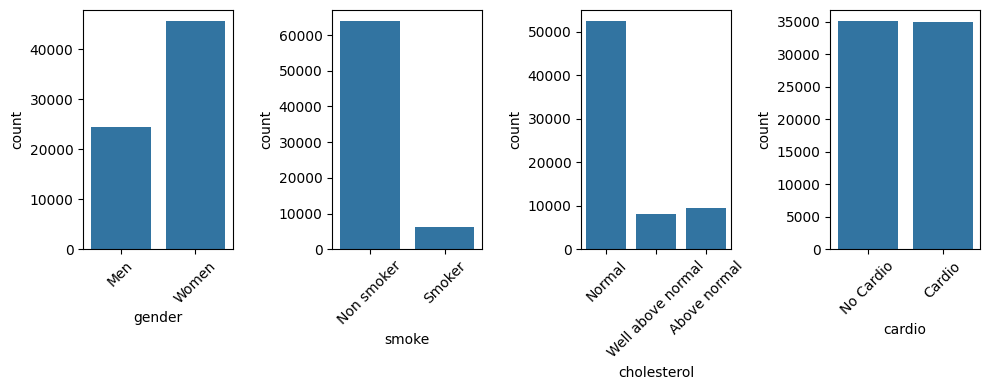

In [109]:
# EDA on dataset
# Assigning data to variables for future visualization
cardio_negative, cardio_positive = df["cardio"].value_counts()
normal_chol, above_normal_chol, well_above_normal_chol = df["cholesterol"].value_counts() 
women, men = df["gender"].value_counts() 

df_plot = df.copy() # manipulating values for plotting on dataset copy
df_plot["cholesterol"] = df_plot["cholesterol"].replace({1:"Normal", 2:"Above normal", 3:"Well above normal"}) # 1 = normal cholesterol, 2 = above normal, 3 = well above normal
df_plot["gender"] = df_plot["gender"].replace({1:"Women", 2:"Men"}) # 1 = women, 2 = men
df_plot["cardio"] = df_plot["cardio"].replace({0:"No Cardio", 1:"Cardio"}) # 0 = no cardio disease, 1 = cardio disease
df_plot["smoke"] = df_plot["smoke"].replace({0:"Non smoker", 1:"Smoker"}) # 0 = Non smoker, 1 = smoker


plot_cols = ["gender", "smoke", "cholesterol", "cardio"]

fig, axs = plt.subplots(nrows=1,ncols=len(plot_cols), figsize=(10,4))
for i, col in enumerate(plot_cols):
    sns.countplot(ax=axs[i], x=df_plot[col])
    # axs[i].bar_label(axs[i].containers[i])
    axs[i].tick_params(axis="x", labelrotation=45)
axs.bar_label()
fig.tight_layout()
# plt.savefig("../visualizations/chol_gender_cardio_distribution.png")




# print(f"{cardio_positive = },  {cardio_negative = }")
# print(f"{normal_chol = }, {above_normal_chol = }, {well_above_normal_chol = }")
# print(f"{women = }, {men = }")